In [1]:
import numpy
print('numpy: {}'.format(numpy.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))

numpy: 1.14.3
pandas: 0.23.0


In [2]:
!pwd

/Users/jakewendt/github/jakewendt/notebooks


In [3]:
file = "data/634370.snps.filtered.count.txt.with_nearests_OR.txt"

In [4]:
import glob
print(glob.glob(file))

['data/634370.snps.filtered.count.txt.with_nearests_OR.txt']


In [5]:
df = pandas.read_csv(file, delimiter="\t")

In [6]:
df.head()

,#chr,pos,5'tetranuc,3'tetranuc,trinuc,mut,trinuc_mut,strand,flank41bp,Ccount,TCcount,TCAcount,TCTcount,YTCAcount,RTCAcount,sample,nearest HERV,nearest HERV position,nearest HERV dist
0,chr1,13813,CCTT,CTTC,CTT,T>G,C[T>G]T,+,TGCCATTTGTCCTGCCCACCTTCTTAGAAGCGAGACGGAGC,23,6,3,3,0,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510,881697
1,chr1,13838,ACCC,CCCA,CCC,C>T,C[C>T]C,+,AGAAGCGAGACGGAGCAGACCCATCTGCTACTGCCCTTTCT,23,7,5,5,0,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510,881672
2,chr1,13868,CTAA,TAAA,TAA,A>G,T[A>G]A,+,CTGCCCTTTCTATAATAACTAAAGTTAGCTGCCCTGGACTA,17,2,1,1,0,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510,881642
3,chr1,14610,AGTA,GTAG,GTA,T>C,G[T>C]A,+,GTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGCTTGTCCT,24,6,3,3,1,1,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510,880900
4,chr1,14932,AAGG,AGGT,AGG,G>T,A[G>T]G,+,AAGGCAGGACAGAATTACAAGGTGCTGGCCCAGGGCGGGCA,25,2,1,1,0,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510,880578



FYI. This distance is HERV position - Mutation position


In [7]:
df['nearest HERV dist'].head()

0    881697
1    881672
2    881642
3    880900
4    880578
Name: nearest HERV dist, dtype: int64

In [8]:
df['nearest HERV dist'][df['nearest HERV dist'] < 100000].head()

522    99142
523    97605
524    97459
525    97154
526    96892
Name: nearest HERV dist, dtype: int64

In [9]:
import matplotlib.pyplot as plt

In [10]:
plt.rcParams["figure.figsize"] = [16.0,4.0]

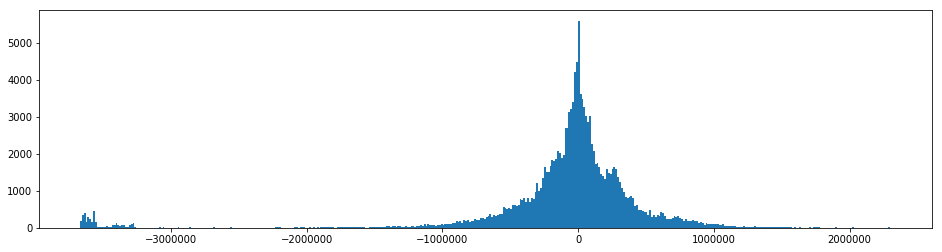

In [11]:
plt.hist(df['nearest HERV dist'], bins='auto')
plt.show()

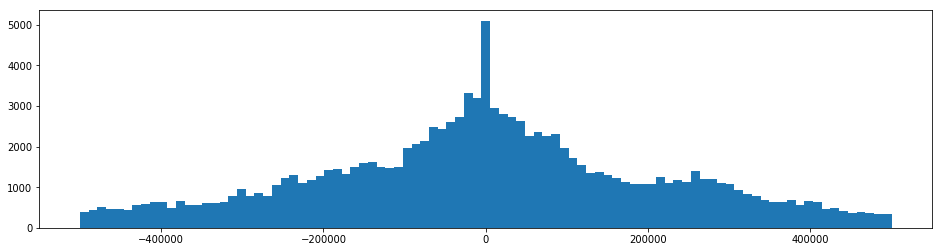

In [12]:
plt.hist(df[df['nearest HERV dist'].abs() < 500000]['nearest HERV dist'], bins='auto')
plt.show()

In [13]:
df[ (df['trinuc_mut'] == 'C[C>T]A' ) & ( df['nearest HERV dist'].abs() < 500000 )]

,#chr,pos,5'tetranuc,3'tetranuc,trinuc,mut,trinuc_mut,strand,flank41bp,Ccount,TCcount,TCAcount,TCTcount,YTCAcount,RTCAcount,sample,nearest HERV,nearest HERV position,nearest HERV dist
379,chr1,620181,CCCA,CCAC,CCA,C>T,C[C>T]A,+,TCACTTAAAATGCTGTGTCCCACCTCACTTTTCAGTGTCTC,18,6,4,4,2,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510,275329
582,chr1,826352,GCCA,CCAT,CCA,C>T,C[C>T]A,+,TGGAAACTTTATGCCACAGCCATTAAATACAGAGATCATAC,15,4,2,2,0,1,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510,69158
758,chr1,1089207,GCCA,CCAC,CCA,C>T,C[C>T]A,+,CCTGCGCCTGTGCATGGGGCCACCTCGGCCCTTGGACTTCA,28,3,1,1,1,0,NaN,"END_ERV_0216289,HERV16-int",906556,-182651
1471,chr1,2653081,ACCA,CCAA,CCA,C>T,C[C>T]A,+,CTGAACGCACGGAGCAGCACCAAAACCCCTAGGGGAGCATC,25,4,1,1,1,0,NaN,"END_ERV_0002181,HERVL-int",2626288,-26793
1498,chr1,2654125,CCCA,CCAC,CCA,C>T,C[C>T]A,+,TGACAACCTGGAGCAGCACCCACACCCCCAGGCGAGCATCT,26,4,2,2,0,1,NaN,"END_ERV_0002181,HERVL-int",2626288,-27837
1520,chr1,2655016,CCCA,CCAG,CCA,C>T,C[C>T]A,+,TGGAACAGCTCTCACAACCCCAGGTGAGCATCTGACAGCCC,24,6,4,4,2,1,NaN,"END_ERV_0002181,HERVL-int",2626288,-28728
1990,chr1,3342097,CCCA,CCAG,CCA,C>T,C[C>T]A,+,ATGAGGCAGCTAGGGAAACCCAGGGTGCACGATGGCCTCTG,25,4,2,2,1,0,NaN,"BEGIN_ERV_0002804,HERVK13-int",3801195,459098
2211,chr1,4090472,TCCA,CCAC,CCA,C>T,C[C>T]A,+,CAGAGGCAGCCGGGGGCCTCCACCAGTGGGTTCACAGCAGC,29,3,2,2,1,0,NaN,"BEGIN_ERV_0217769,HERVH-int,LTR7A,LTR7B",4178039,87567
2270,chr1,4336044,CCCA,CCAG,CCA,C>T,C[C>T]A,+,TGGCCTGAAGAGGCTGACCCCAGGGCATAATGCGTGGGCCT,26,3,3,3,1,1,NaN,"BEGIN_ERV_0003225,HERV16-int",4342524,6480
2553,chr1,5098165,CCCA,CCAC,CCA,C>T,C[C>T]A,+,CTGGAAATTGACCCATGACCCACCCACATTCCAGCTAGTGG,22,4,2,2,0,2,NaN,"BEGIN_ERV_0003900,HERVH-int,LTR7",5114487,16322


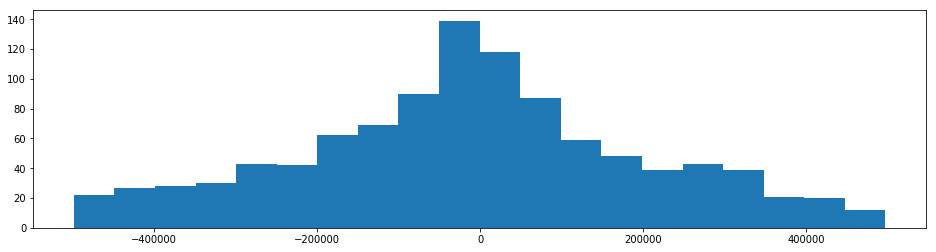

In [14]:
plt.hist(df[ (df['trinuc_mut'] == 'C[C>T]A' ) & ( df['nearest HERV dist'].abs() < 500000 )]['nearest HERV dist'], bins='auto')
plt.show()

In [15]:
df['nearest HERV dist'].median()

-5841.5

In [16]:
df['nearest HERV dist'].mean()

-96488.41625238473

In [17]:
df['nearest HERV dist'].std()

679045.5187752446

In [18]:
df['nearest HERV dist'].var()

461102816568.741

In [19]:
df[df['trinuc_mut'] == 'C[T>G]T']['nearest HERV dist'].std()

704996.6427632398

In [20]:
df[df['trinuc_mut'] == 'C[C>T]A']['nearest HERV dist'].std()

661359.1671426482

In [21]:
df[df['mut'] == 'C>T']['nearest HERV dist'].std()

611579.6211988387

In [22]:
df[df['mut'] == 'C>A']['nearest HERV dist'].std()

711490.4143181653

In [23]:
df[df['mut'] == 'G>A']['nearest HERV dist'].std()

620777.2119192473

In [24]:
df[df['mut'] == 'C>G']['nearest HERV dist'].std()

968051.3509674051

In [25]:
df[df['mut'] == 'A>C']['nearest HERV dist'].std()

718616.1921091077

In [26]:
df['mut'].unique()

array(['T>G', 'C>T', 'A>G', 'T>C', 'G>T', 'C>G', 'G>A', 'T>A', 'G>C',
       'A>C', 'C>A', 'A>T'], dtype=object)

In [27]:
import sys
def printf(format, *args):
    sys.stdout.write(format % args)

In [28]:
numpy.sort(df['mut'].unique())

array(['A>C', 'A>G', 'A>T', 'C>A', 'C>G', 'C>T', 'G>A', 'G>C', 'G>T',
       'T>A', 'T>C', 'T>G'], dtype=object)

In [29]:
printf("%4s %8s %9s %12s %12s\n", "mut", "count", "mean", "median", "stdev")
for mut in numpy.sort(df['mut'].unique()):
    df_mut=df[df['mut'] == mut]
    df_mut_values=df_mut['nearest HERV dist']
    printf("%4s %8d %12.2f %12.2f %12.2f\n",mut,
           df_mut.size,
           df_mut_values.mean(),
           df_mut_values.median(),
           df_mut_values.std() )

 mut    count      mean       median        stdev
 A>C   139498   -133780.28    -13537.00    718616.19
 A>G   479104    -50438.51      -581.00    586454.37
 A>T    54492   -426522.99    -34407.50   1145466.90
 C>A   138301   -121917.41    -14680.00    711490.41
 C>G    56734   -262845.79    -21898.00    968051.35
 C>T   494855    -64853.83     -2570.00    611579.62
 G>A   490010    -70632.53     -4139.50    620777.21
 G>C    58957   -236578.96    -28568.00    890904.57
 G>T   140600   -126116.00    -13065.00    730677.81
 T>A    54302   -365510.91    -31998.00   1083897.49
 T>C   486419    -62520.74     -2625.00    604082.47
 T>G   135546   -124040.88    -11582.50    740526.51


In [33]:
printf("%5s %10s %9s %12s %12s\n", "mut", "count", "mean", "median", "stdev")
for mut in numpy.sort(df['trinuc_mut'].unique()):
    df_mut=df[df['trinuc_mut'] == mut]
    df_mut_values=df_mut['nearest HERV dist']
    printf("%6s %8d %12.2f %12.2f %12.2f\n",mut,
           df_mut.size,
           df_mut_values.mean(),
           df_mut_values.median(),
           df_mut_values.std() )

  mut      count      mean       median        stdev
A[A>C]A    17328   -135188.62    -14656.00    716627.15
A[A>C]C     9785   -110758.10    -11276.00    610589.17
A[A>C]G     6061   -114764.94    -17005.00    700263.38
A[A>C]T     8512   -116514.31     -4433.50    734575.67
A[A>G]A    27778    -47230.65     -3501.00    550820.57
A[A>G]C    22705    -60291.71     -5126.00    580092.37
A[A>G]G    26600    -39941.98       910.50    588126.50
A[A>G]T    39634    -28019.12       769.00    522533.89
A[A>T]A     5776   -315922.31    -46290.00    927191.47
A[A>T]C     2888   -493026.45    -56972.00   1256213.32
A[A>T]G     3743   -401474.33    -28824.00   1116554.52
A[A>T]T     4674   -421091.22       555.00   1253399.49
A[C>A]A    16739   -120326.08    -13788.00    650208.50
A[C>A]C    11704    -62786.46    -19791.50    525693.11
A[C>A]G     6346    -47157.17     -4299.50    590493.25
A[C>A]T     9006   -187796.55    -16996.50    843221.69
A[C>G]A     6232   -305871.33    -18531.50    98291

T[C>G]A     6346   -393789.22    -31166.50   1125412.55
T[C>G]C     3648   -564725.89    -42766.50   1331332.68
T[C>G]G     2223   -438466.96    -21988.00   1205652.18
T[C>G]T     7334   -240805.07    -18853.00    953395.65
T[C>T]A    26163    -52259.01     -1348.00    573632.42
T[C>T]C    22667   -143764.22     -3655.00    800103.81
T[C>T]G    32034   -194489.94     -7015.00    915235.70
T[C>T]T    30210    -37692.23      2212.50    565915.69
T[G>A]A    26011   -107438.16     -7103.00    690055.53
T[G>A]C    20102    -70396.77     -4298.00    585083.78
T[G>A]G    23902    -74866.76     -4000.00    649363.92
T[G>A]T    51167    -51513.63     -3342.00    562865.66
T[G>C]A     6460   -329651.45    -49091.50    991662.02
T[G>C]C     3116   -230186.63    -19035.00    907901.88
T[G>C]G     3287   -274372.13       742.00   1002483.61
T[G>C]T     6517   -248945.11    -30355.00    868374.62
T[G>T]A     9120   -203549.84    -13643.50    897207.48
T[G>T]C     9956   -151019.16    -14599.00    77